In [1]:
import pandas as pd

results_file = "../../model_batch_nr_7000.json.result"
label_file = "labels_sampled.txt" #"july_week_5_test.dat.labels.txt"

n_batches = 30

background_label = "0"

results_df = pd.read_csv(results_file, delimiter=";")
results_df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""1 10 28611 28611 28611 28611 28611 28611 286...","[15,15,15,15,15,15,15,15,15,15,15]","[-9.84865,-0.205444,-0.205444,-0.205444,-0.20...",-15.9461,-1.44965,-9.84865
1,1,"""1 10 28611 28611 28611 28611 28611 28611 286...","[15,15,15,15,15,15,15,15,15,15,15]","[-9.84865,-0.205444,-0.205444,-0.205444,-0.20...",-15.9461,-1.44965,-9.84865
2,1,"""1 10 28611 28611 28611 28611 28611 28611 286...","[15,15,15,15,15,15,15,15,15,15,15]","[-9.84865,-0.205444,-0.205444,-0.205444,-0.20...",-15.9461,-1.44965,-9.84865
3,1,"""1 10 28611 28611 28611 28611 28611 28611 286...","[15,15,15,15,15,15,15,15,15,15,15]","[-9.84865,-0.205444,-0.205444,-0.205444,-0.20...",-15.9461,-1.44965,-9.84865
4,1,"""1 10 28611 28611 28611 28611 28611 28611 286...","[15,15,15,15,15,15,15,15,15,15,15]","[-9.84865,-0.205444,-0.205444,-0.205444,-0.20...",-15.9461,-1.44965,-9.84865
...,...,...,...,...,...,...,...
97701,1,"""1 10 28642 28642 28642 28642 28642 28642 286...","[36,36,36,36,36,36,36,36,36,36,36]","[-4.37797,-0.00148055,-0.00148055,-0.00148055...",-14.1655,-1.28777,-9.77418
97702,1,"""1 10 28642 28642 28642 28642 28642 28642 286...","[36,36,36,36,36,36,36,36,36,36,36]","[-4.37797,-0.00148055,-0.00148055,-0.00148055...",-14.1655,-1.28777,-9.77418
97703,1,"""1 10 28642 28642 28642 28642 28642 28642 286...","[36,36,36,36,36,36,36,36,36,36,36]","[-4.37797,-0.00148055,-0.00148055,-0.00148055...",-14.1655,-1.28777,-9.77418
97704,1,"""1 10 58433 58433 58433 58433 58402 58402 584...","[48,48,48,48,752,-1]","[-10.1637,-0.275412,-0.275412,-0.275412,-3.29...",-14.6913,-2.44855,-10.16370


In [2]:
results_df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

In [3]:
unparsable_seqs = set()
for i, ss in enumerate(results_df[" state sequence"]):
    s_set = set([int(x) for x in ss.strip().strip("[").strip("]").split(",")])
    if -1 in s_set:
        unparsable_seqs.add(i)

In [4]:
mean_scores = results_df[" mean scores"]
min_scores = results_df[" min score"]

def get_specific_score(x:str):
    index = -1
    s = x.strip().strip("[").strip("]").split(",")
    return float(s[index])

individual_scores = results_df[" score sequence"].apply(get_specific_score)

del results_df

In [5]:
import numpy as np

labels = list()
for line in open(label_file, "rt"):
    label_set = set(line.split())
    #if "1" in label_set:
    if line.split()[-1] != background_label:
        labels.append(1)
    else:
        labels.append(0)
        
labels = np.array(labels)
np.unique(labels, return_counts=True)

(array([0, 1]), array([50224, 47482]))

In [6]:
len(labels), len(mean_scores)

(97706, 97706)

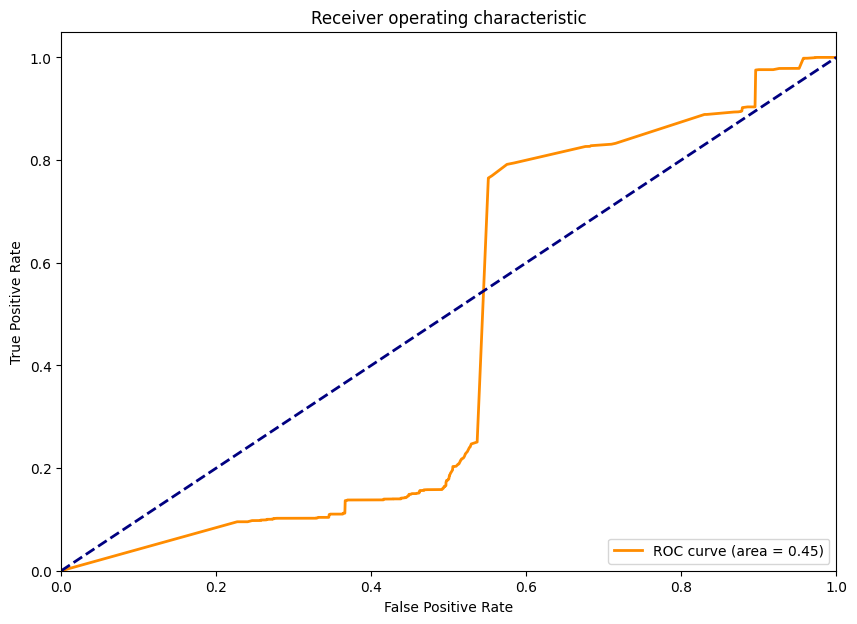

In [7]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

score = -individual_scores

#for idx in unparsable_seqs:
#    score[idx] = 100

fpr, tpr, thresholds = roc_curve(labels, score)
roc_auc = roc_auc_score(labels, score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

# Do the CSS files, check per input

Batch nr  1000
Len res_df:  97706
Plotting


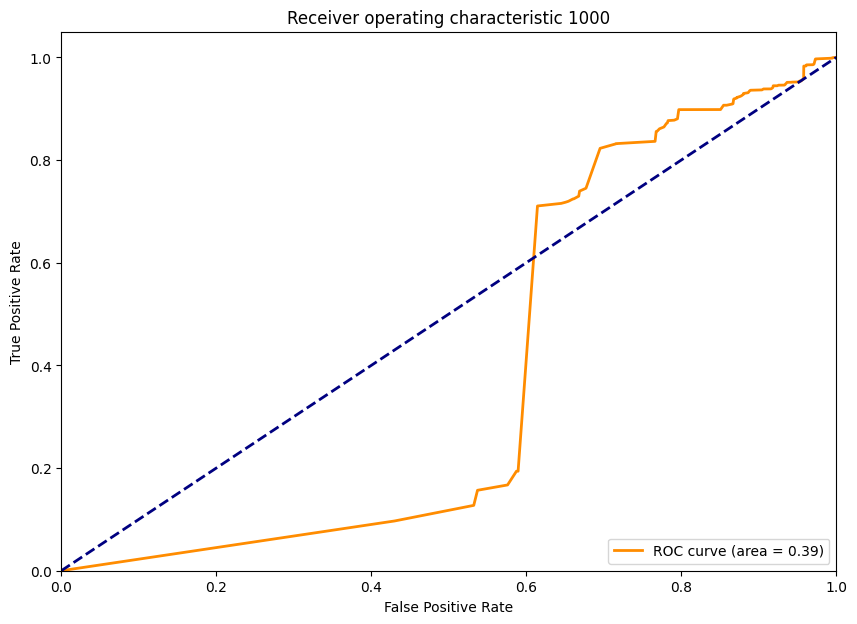

Batch nr  2000
Len res_df:  97706
Plotting


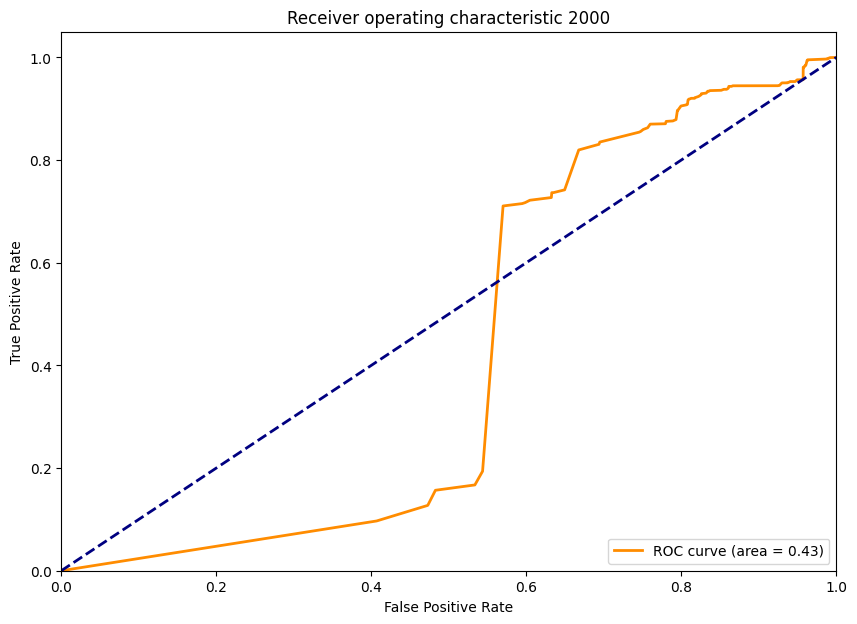

Batch nr  3000
Len res_df:  97706
Plotting


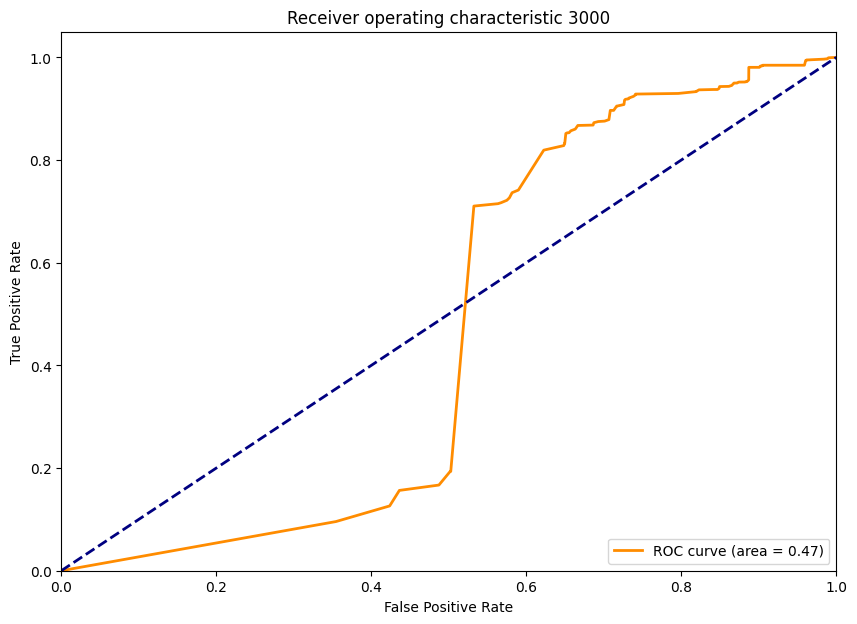

Batch nr  4000
Len res_df:  97706
Plotting


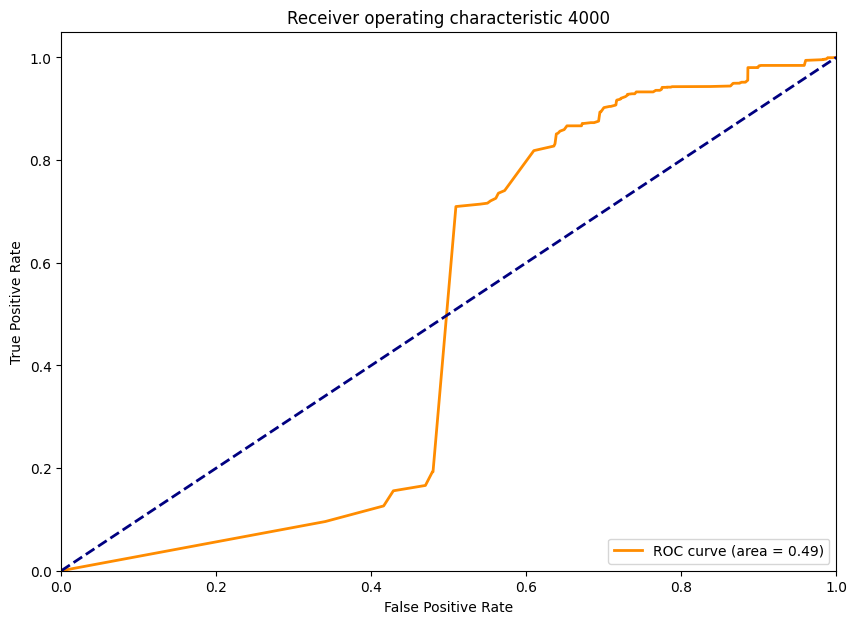

Batch nr  5000
Len res_df:  97706
Plotting


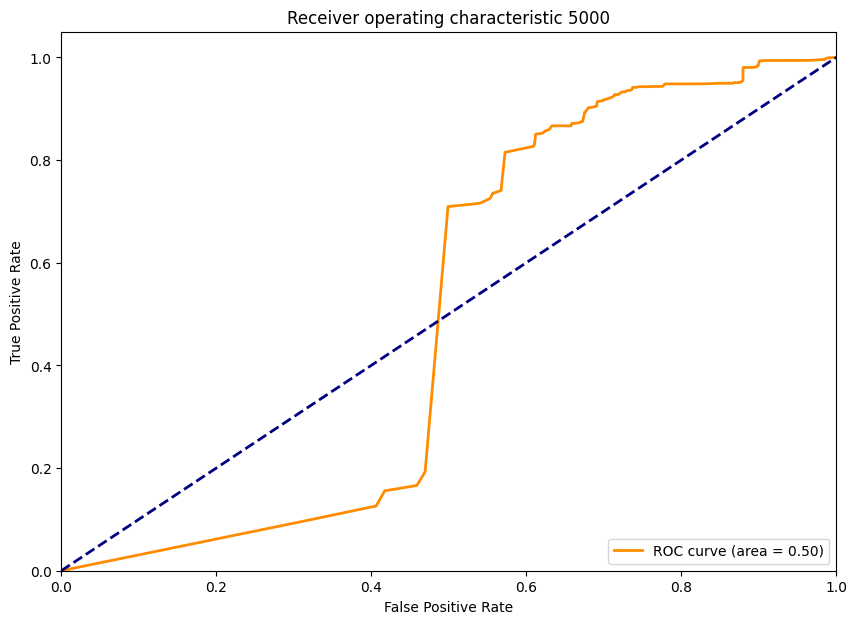

Batch nr  6000
Len res_df:  97706
Plotting


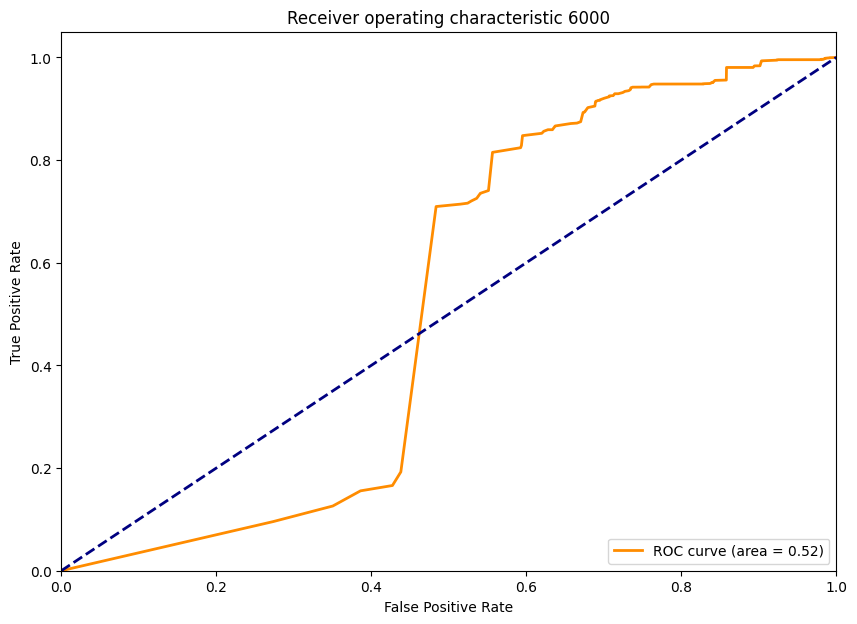

Batch nr  7000
Len res_df:  97706
Plotting


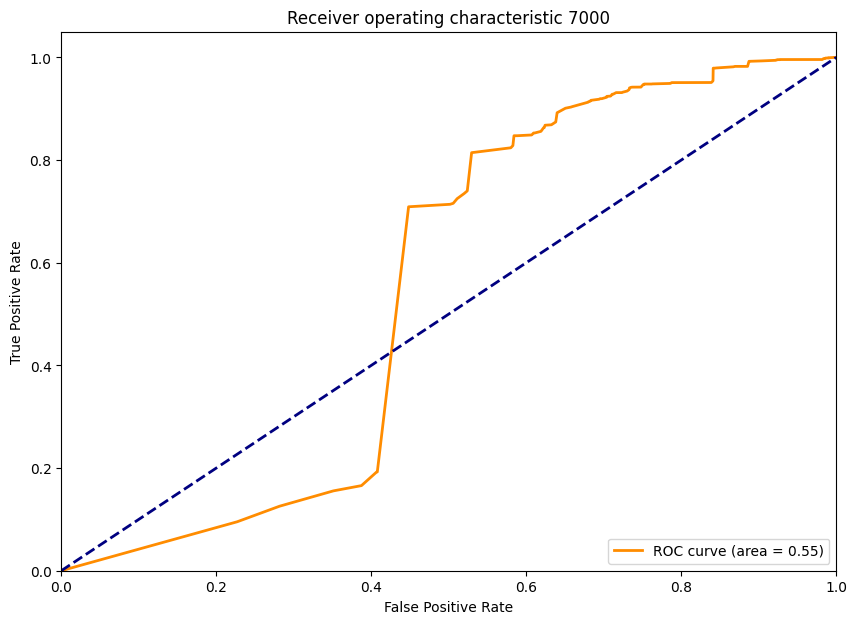

Batch nr  8000
Len res_df:  97706
Plotting


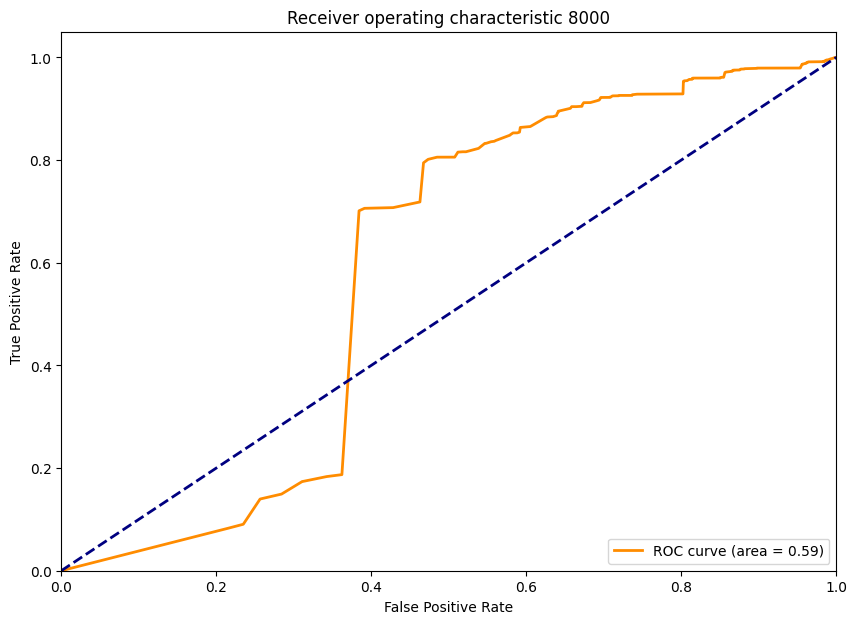

Batch nr  9000
Len res_df:  97706
Plotting


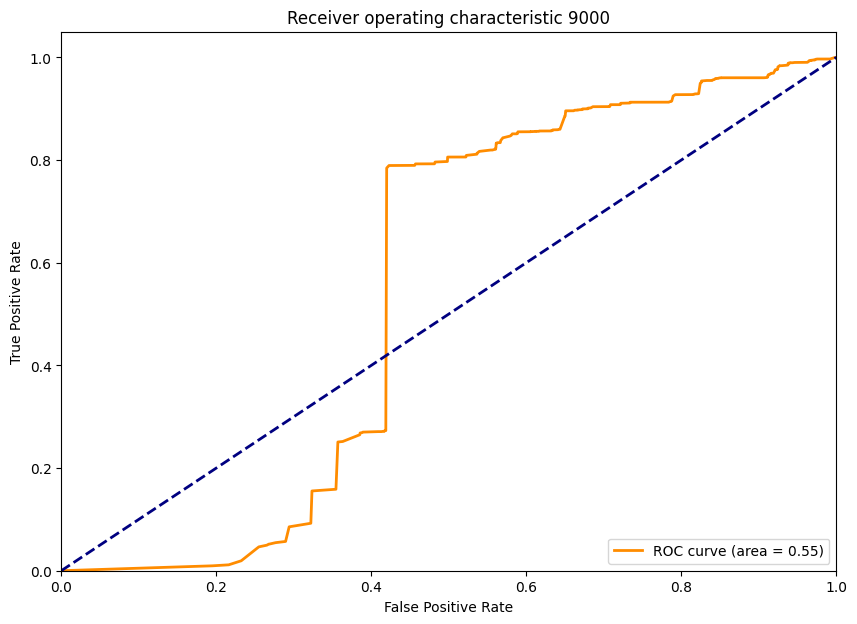

Batch nr  10000
Len res_df:  97706
Plotting


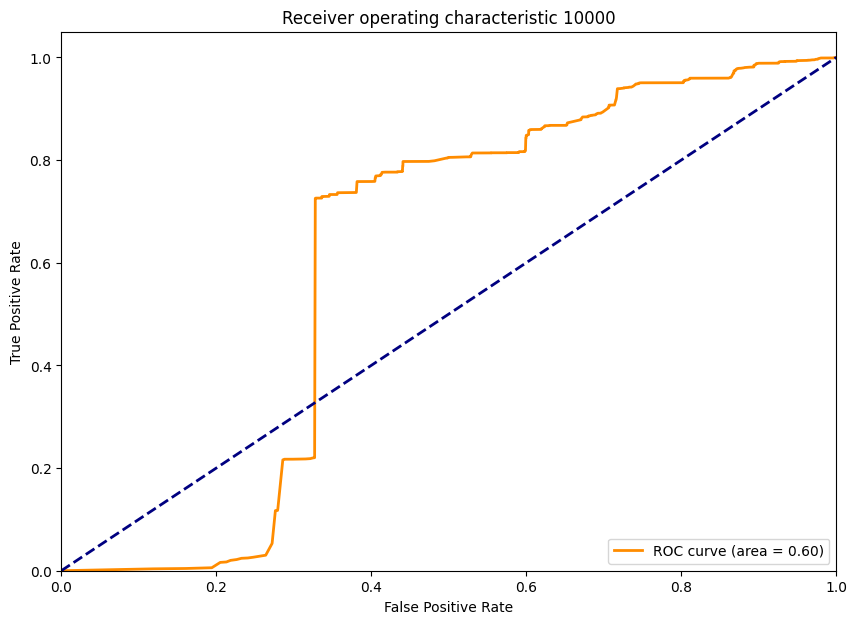

Batch nr  11000
Len res_df:  97706
Plotting


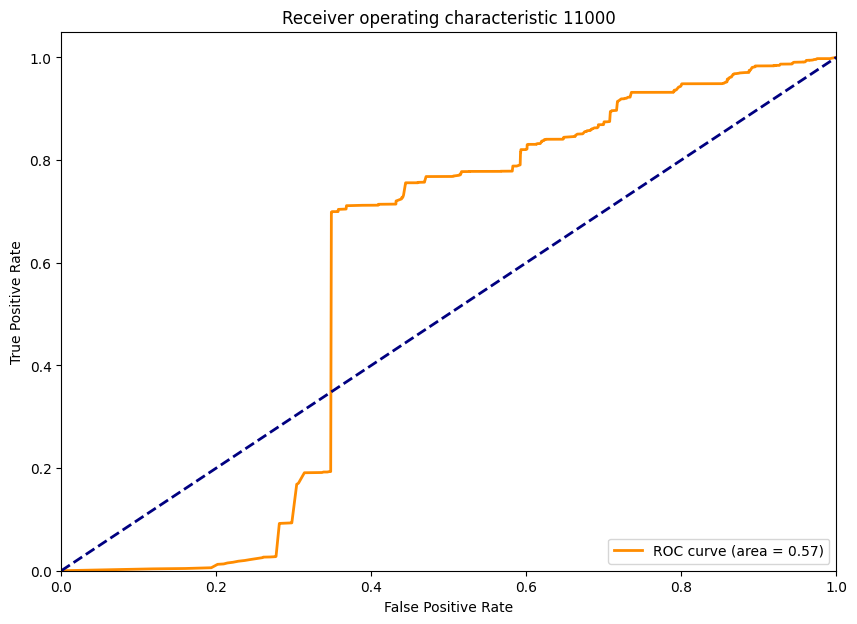

Batch nr  12000
Len res_df:  97706
Plotting


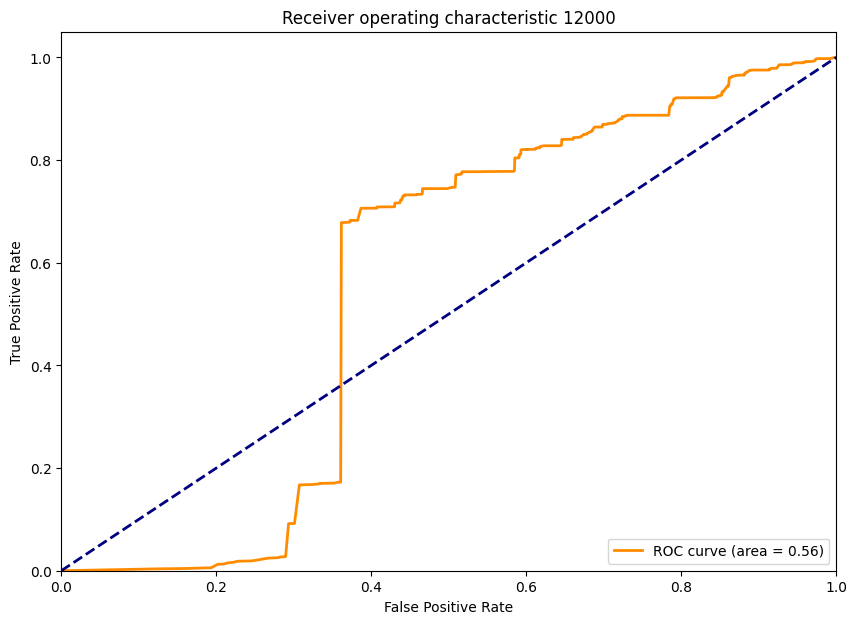

Batch nr  13000
Len res_df:  97706
Plotting


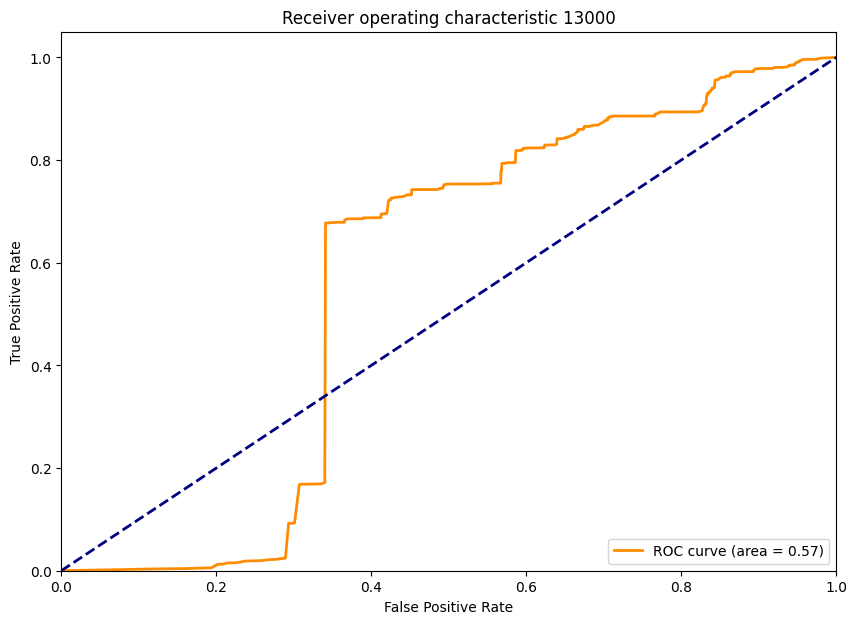

Batch nr  14000
Len res_df:  97706
Plotting


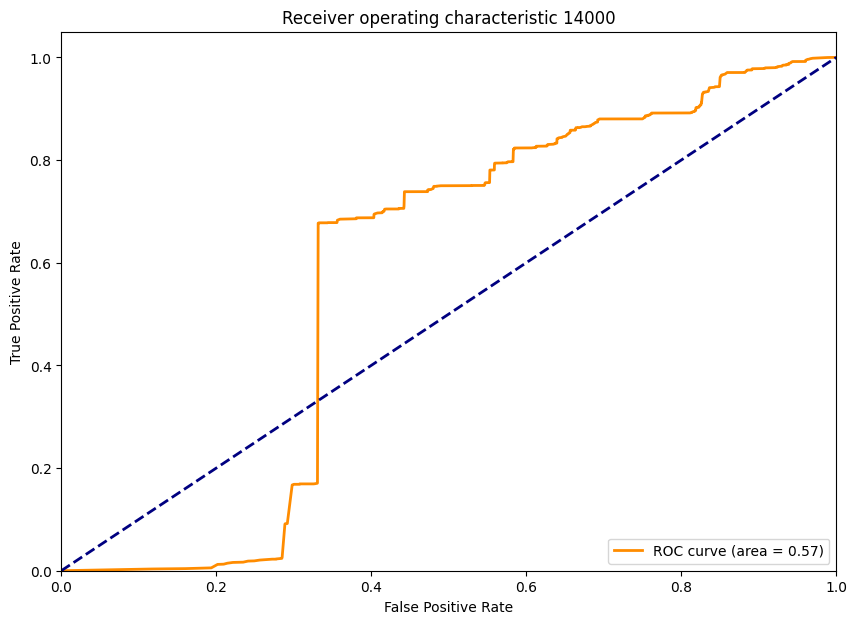

Batch nr  15000
Len res_df:  97706
Plotting


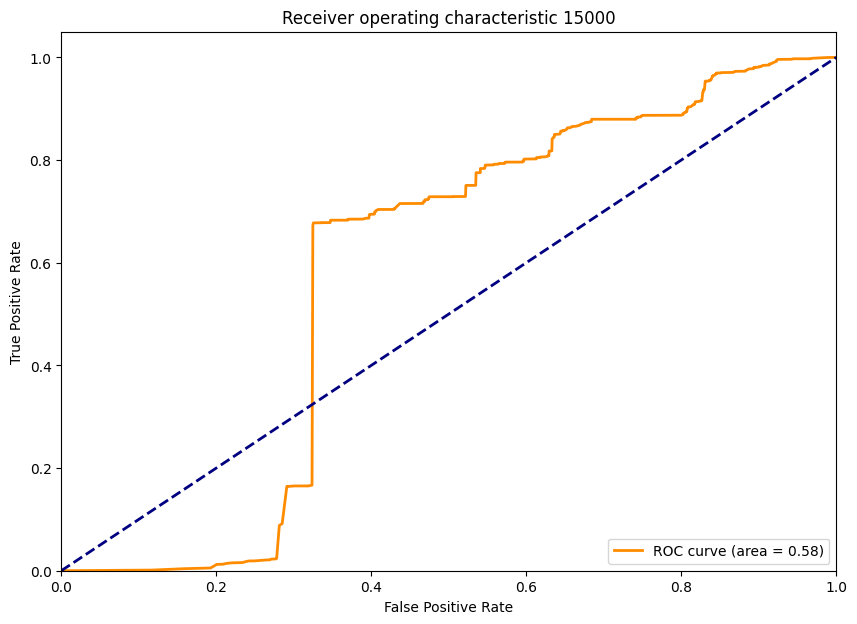

Batch nr  16000
Len res_df:  97706
Plotting


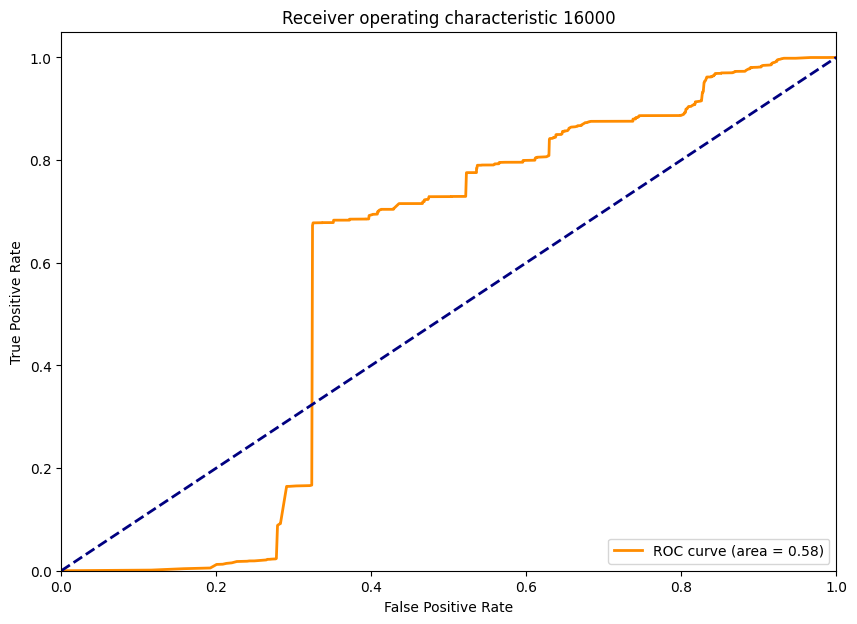

Batch nr  17000
Len res_df:  97706
Plotting


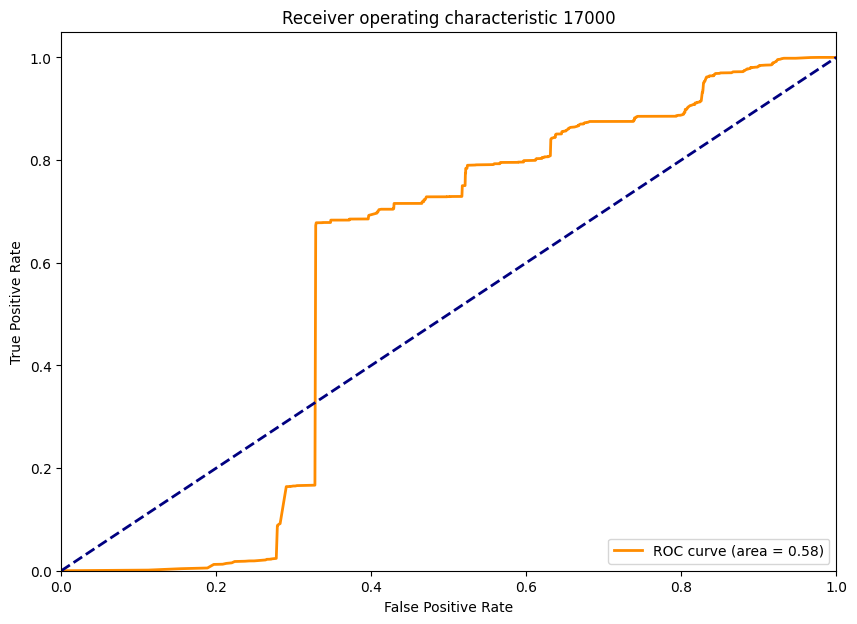

Batch nr  18000
Len res_df:  97706
Plotting


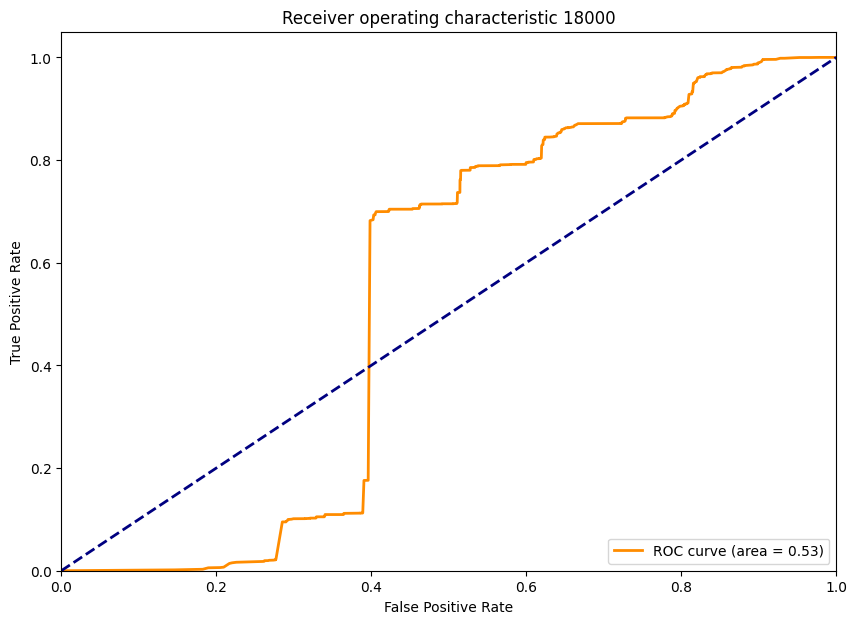

Batch nr  19000
Len res_df:  97706
Plotting


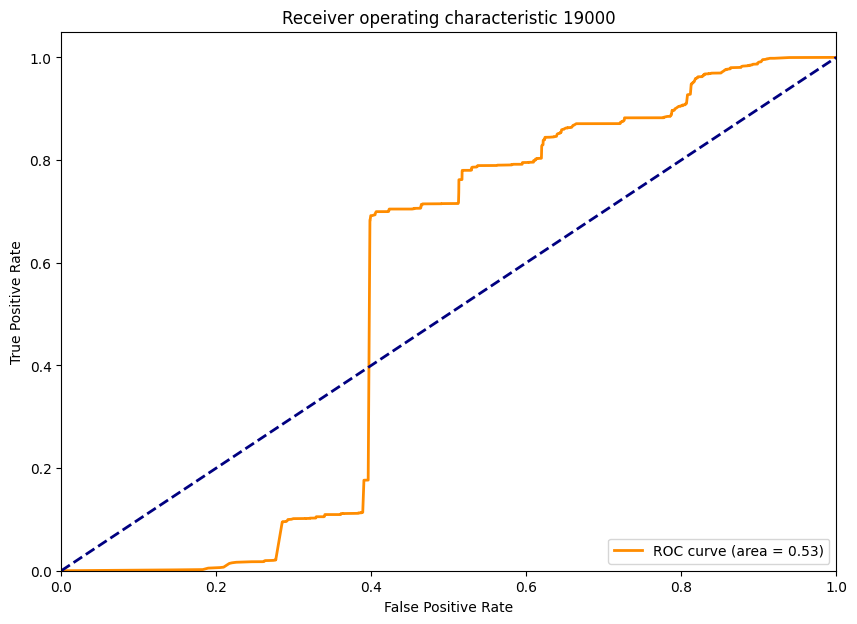

Batch nr  20000
Len res_df:  97706
Plotting


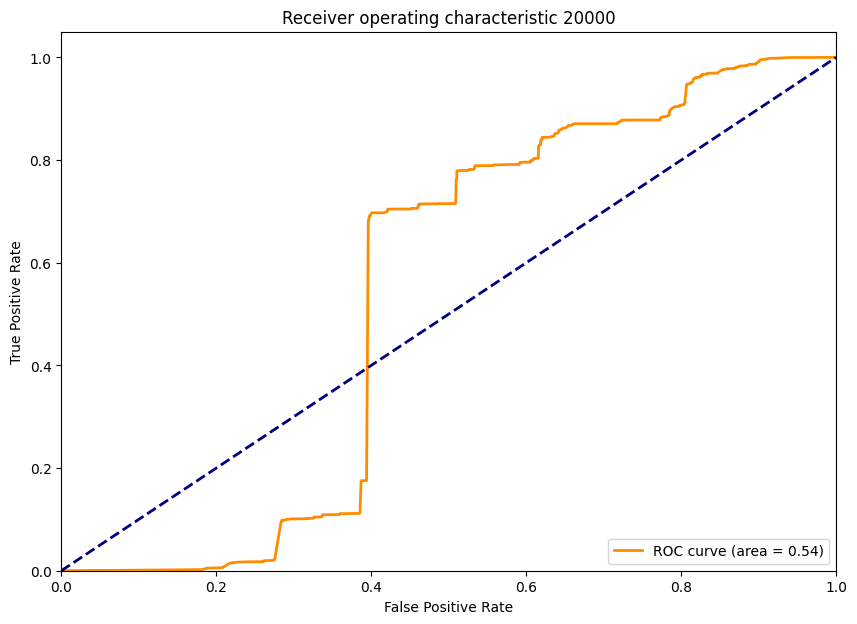

Batch nr  21000
Len res_df:  97706
Plotting


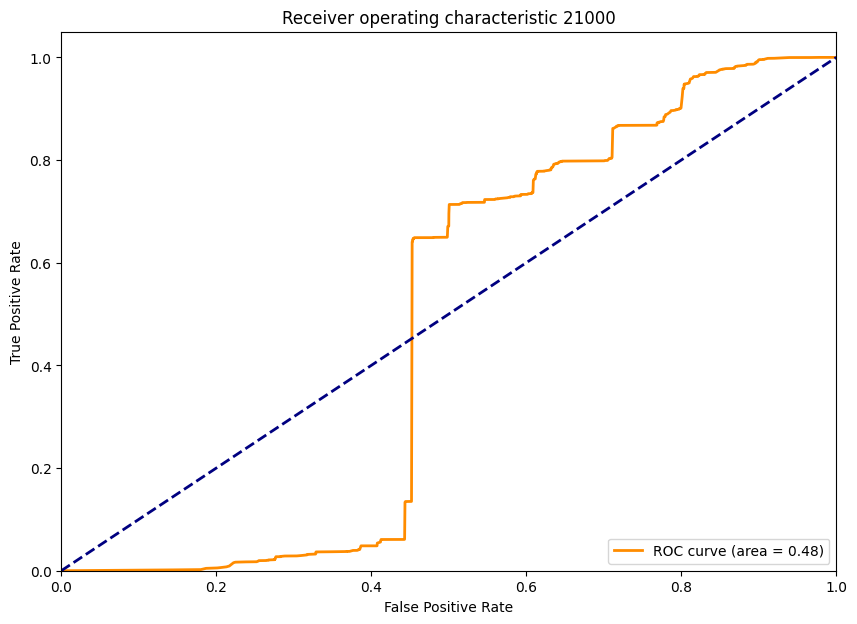

Batch nr  22000
Len res_df:  97706
Plotting


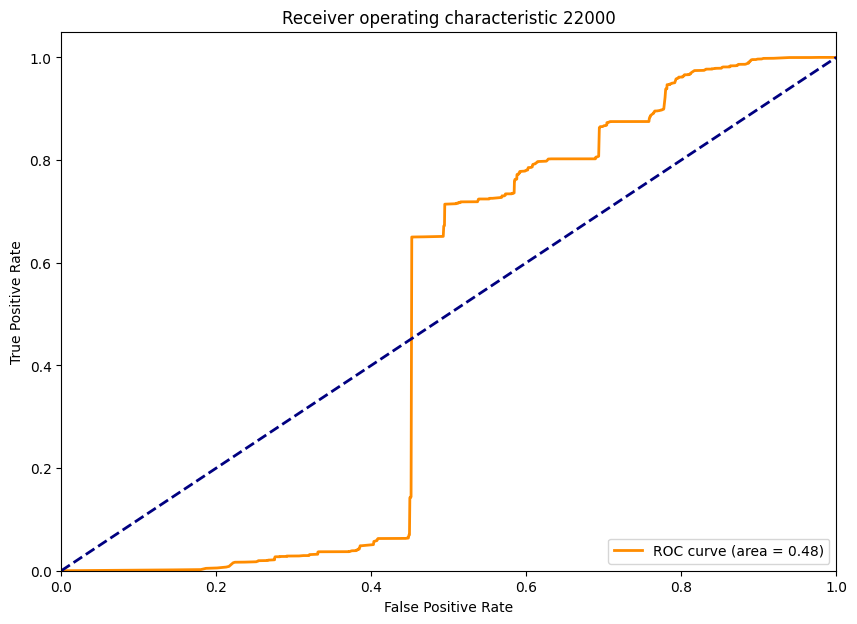

Batch nr  23000
Len res_df:  97706
Plotting


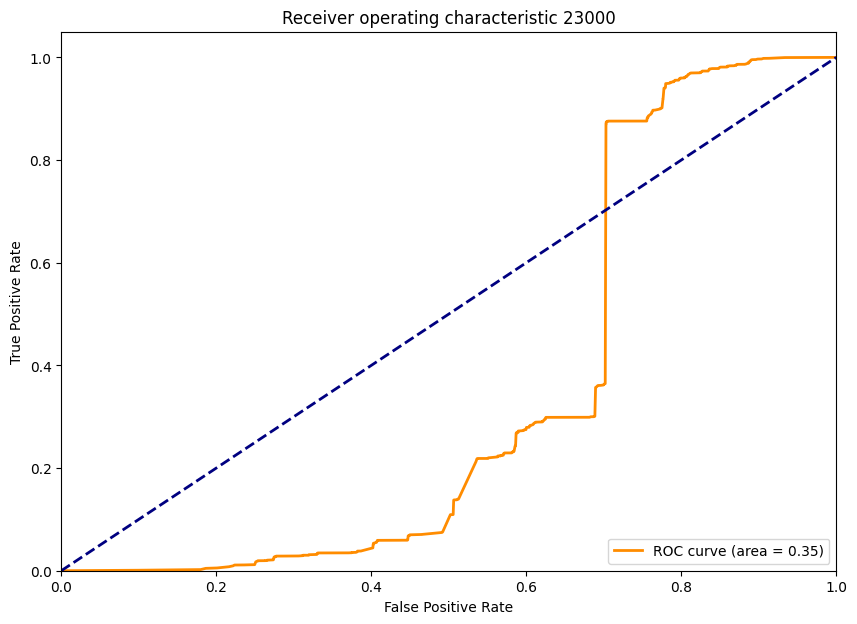

Batch nr  24000
Len res_df:  97706
Plotting


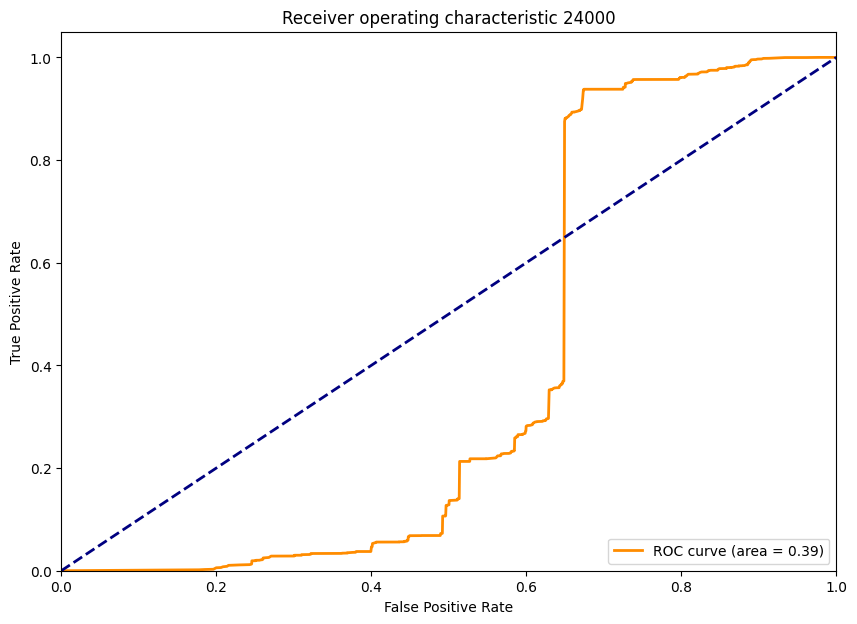

Batch nr  25000
Len res_df:  97706
Plotting


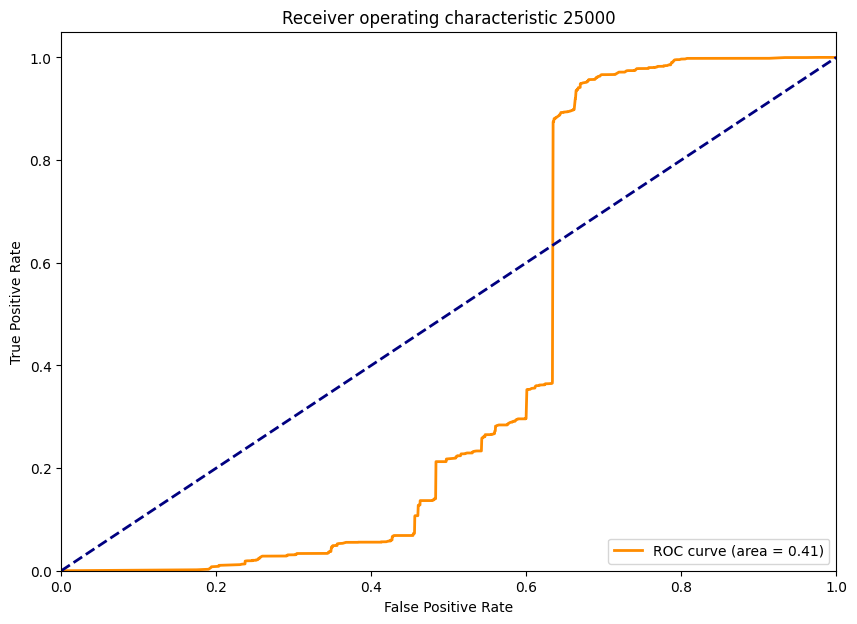

Batch nr  26000
Len res_df:  97706
Plotting


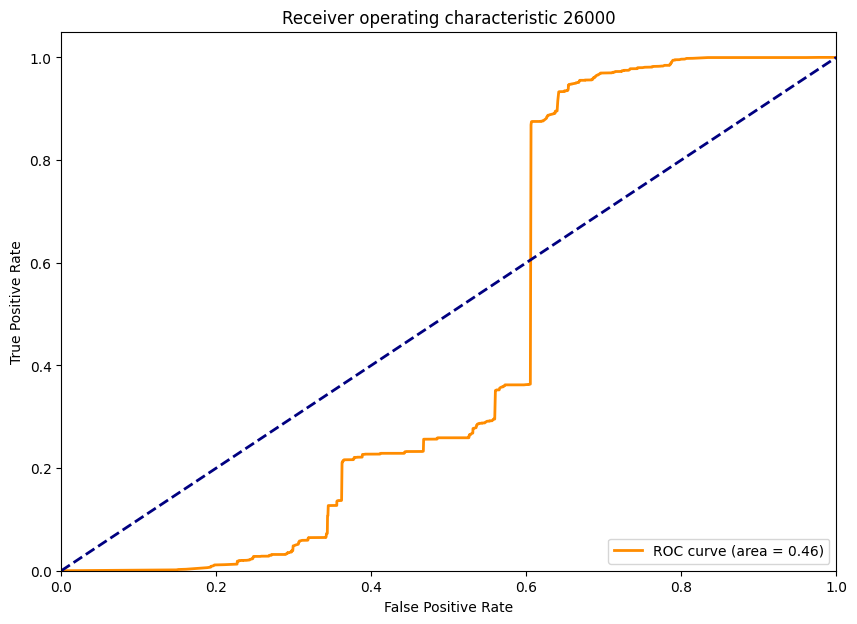

Batch nr  27000
Len res_df:  97706
Plotting


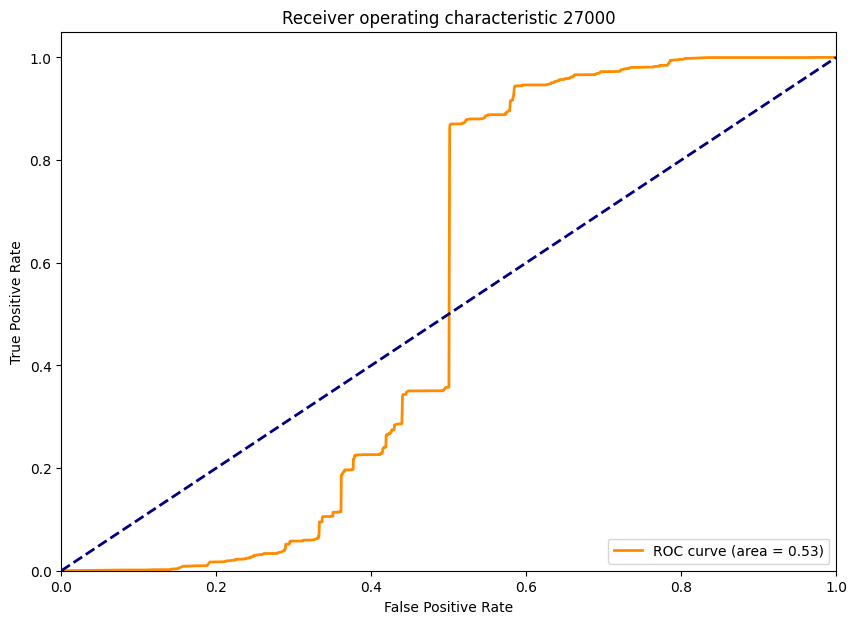

Batch nr  28000
Len res_df:  97706
Plotting


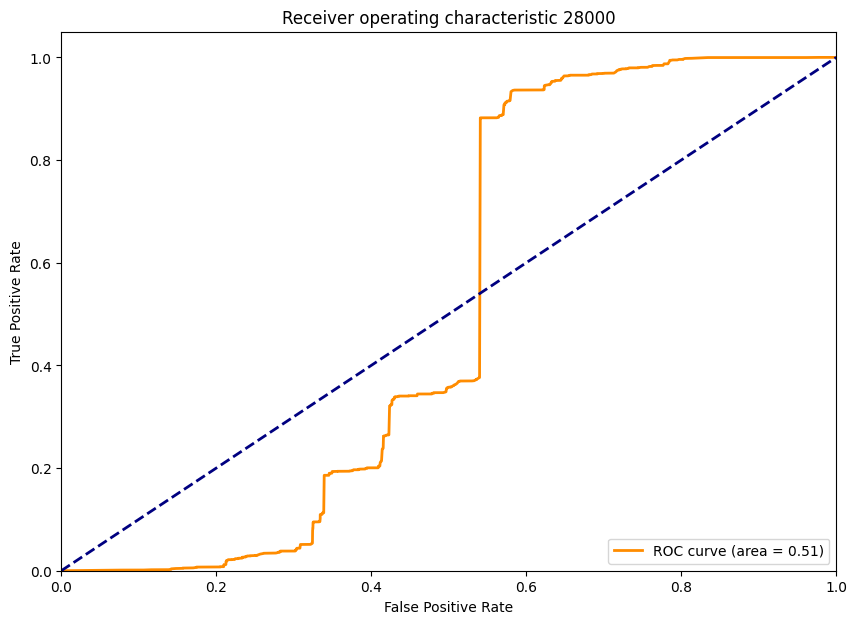

Batch nr  29000
Len res_df:  97706
Plotting


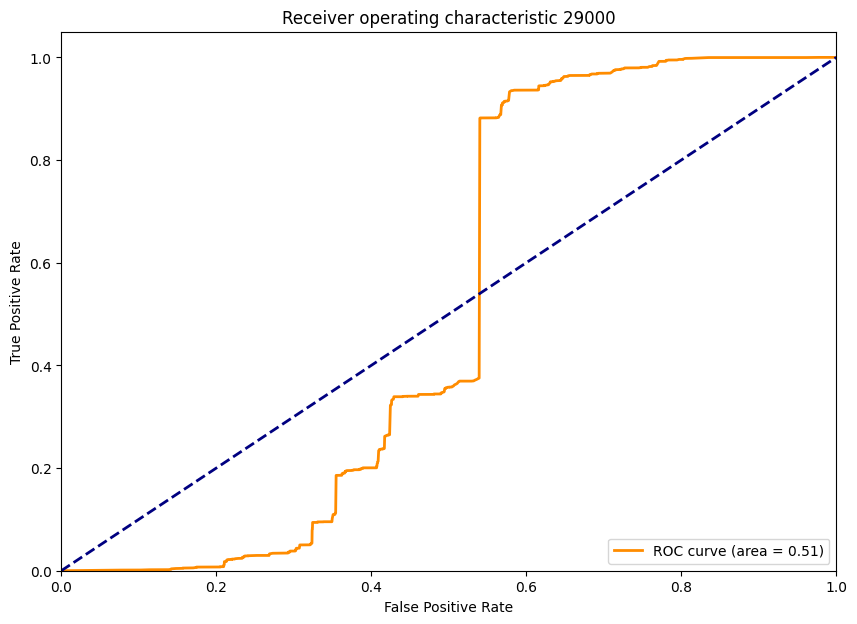

Batch nr  30000
Len res_df:  97706
Plotting


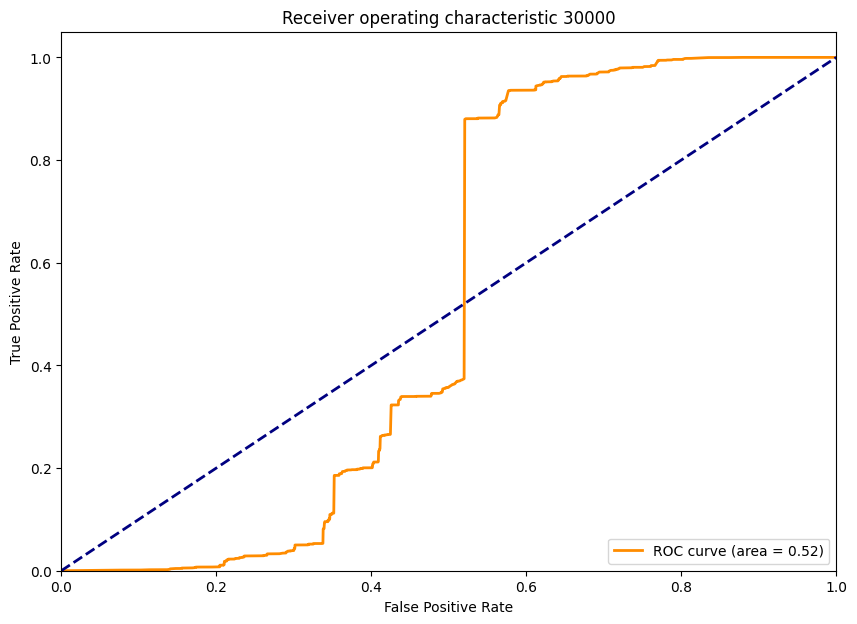

In [8]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

base_dir = "../.."

for i in range(1, n_batches+1):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]
    min_scores = results_df[" min score"]
    
    print("Len res_df: ", len(results_df))

    del results_df
    
    score = -min_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    roc_auc = roc_auc_score(labels, score)

    print("Plotting")
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        #hue=thresholds,
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
        #cmap="viridis"
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(batch_nr))
    plt.legend(loc="lower right")
    plt.show()

In [9]:
raise Exception("Stop here")

Exception: Stop here

# Performance drops in last batch. What now?

We are curious about the sequences that are predicted falsely. Do they overlap? If not, how are they represented in the model

### Step 1: For each model, find the threshold and plot it into the ROC curve. Will the geometric/harmonic mean work?

In [ ]:
for i in range(1, n_batches+1):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]
    min_scores = results_df[" min score"]

    del results_df

    score = mean_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    roc_auc = roc_auc_score(labels, score)
    
    harmonic_mean = 2*(1-fpr)*tpr/((1-fpr)+tpr)
    geometric_mean = np.sqrt((1-fpr)*tpr)

    hm_index = np.argmax(harmonic_mean)
    gm_index = np.argmax(geometric_mean)
    
    print("Plotting")
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        #hue=thresholds,
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
        #cmap="viridis"
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    
    plt.scatter([fpr[hm_index]], [tpr[hm_index]], color="red", label="Harmonic mean")
    plt.scatter([fpr[gm_index]], [tpr[gm_index]], color="green", label="Geometric mean")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(batch_nr))
    plt.legend(loc="lower right")
    plt.show()

### Step 2: With the thresholds looking good, we now will determine falsely classified elements via their index

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
import os

def map_result(x, threshold):
    if x < threshold:
        return 0
    return 1

for i in range(1, n_batches+1):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]

    del results_df

    score = mean_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    
    harmonic_mean = 2*(1-fpr)*tpr/((1-fpr)+tpr)
    geometric_mean = np.sqrt((1-fpr)*tpr)

    hm_index = np.argmax(harmonic_mean)
    gm_index = np.argmax(geometric_mean)
    
    threshold = thresholds[hm_index]
    results_mapped = np.array( list( map(map_result, list(score), [float(threshold)] * len(score) ) ) )
    #print("Batch nr ", batch_nr, ": " balanced_accuracy_score(results_mapped, labels))

In [ ]:
false_prediction_indices = dict()
scores = pd.DataFrame()
thresholds = dict()

for i in range(1, n_batches+1):
    batch_nr = str(int(i*1000))
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]
    min_scores = results_df[" min score"]

    del results_df

    score = min_scores
    scores["Batch {}".format(i)] = score

    fpr, tpr, thresholds = roc_curve(labels, score)
    
    harmonic_mean = 2*(1-fpr)*tpr/((1-fpr)+tpr)
    geometric_mean = np.sqrt((1-fpr)*tpr)

    hm_index = np.argmax(harmonic_mean)
    gm_index = np.argmax(geometric_mean)
    
    thresholds[i] = gm_index
    
    threshold = thresholds[hm_index]
    results_mapped = np.array( list( map(map_result, list(score), [float(threshold)] * len(score) ) ) )
    
    false_prediction_indices[i] = set( list(np.where(results_mapped != labels)[0].reshape(-1)) )
print(len(false_prediction_indices))
print(len(false_prediction_indices[1]))

In [ ]:
scores["label"] = labels
scores.label.value_counts(), scores.label.dtype

In [ ]:
scores

In [ ]:
#sns.boxplot(data=scores, hue="label")
_ = scores.boxplot(by="label", figsize=(20, 20))
#plt.savefig("sicco.png")

### Step 3: Looks like malign sequences are more prevalent than benign ones. Check this hypothesis

In [ ]:
malign_indices = np.where(labels==1)[0]
len(malign_indices)

In [ ]:
malign_sequences = set()
